<a href="https://colab.research.google.com/github/pcarbo/qBio9_stuff/blob/main/basic_computing_qbio9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some initial notes about computing
----------------------------------

The first computer I learned to program on was an [Apple IIc](https://en.wikipedia.org/wiki/Apple_IIc). Things have changed a lot since then. Some highlights include:

+ Computing has become highly distributed. (Most likely, a lot of the data for your research will be stored in computers that are very far away from you, and yet you can access these data in seconds. And you can even *analyze your data* on computers far away that you cannot see or touch.)

+ The world of computing has expanded enormously in scope and variety, and [computing technology continues to change rapidly](https://catalog.lib.uchicago.edu/vufind/Record/10996185).

+ [Interactive programming](https://py.mit.edu/spring23/labs/lisp_1) has become a predominant mode for doing computing, in particular for analyzing data.

+ Scientific computing tools, data sets and papers are
increasingly **open**. (See
[the NIH's new policy on sharing data](https://oir.nih.gov/sourcebook/intramural-program-oversight/intramural-data-sharing/2023-nih-data-management-sharing-policy).)

How should we navigate this complex computing world for our research?
Here are a few ideas:

+ *As scientists* navigating this complex computing world, we should strive to understand, and check that our understanding is correct.

+ Simple tools that we understand are sometimes more helpful than complex tools that we don't understand.

+ The ability to organize your work, and make it *human accessible*, is now more important than ever. (See: git, HTML, [workflowr](https://doi.org/10.12688/f1000research.20843.1)).

+ We should learn from each other (no single person is an authority).

What is this document?
----------------------

This is a *jupyter notebook.*

*More text here.*

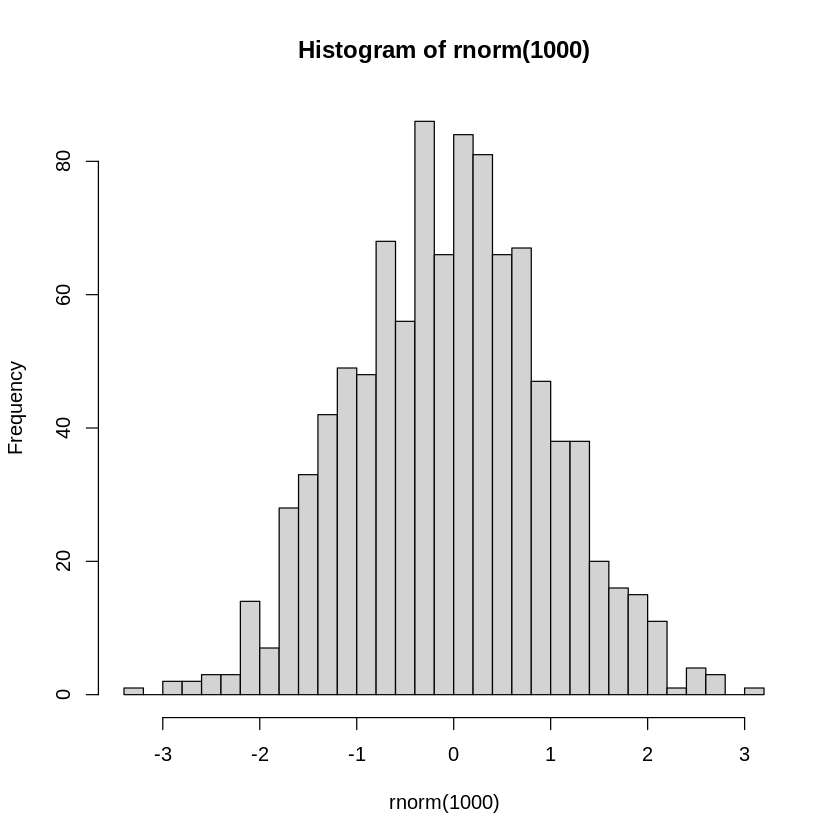

In [1]:
hist(rnorm(1000),n = 32)

In [2]:
sd(rnorm(1000))

[1] 1.024074